In [35]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [36]:
#Testing dataset
filepath = "./winequality.csv"

df = pd.read_csv(filepath)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Understanding the data

In [37]:
df.shape

(1599, 12)

In [38]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
# Display summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Learning more about the data through Explatory Data Analysis (EDA)

C:\Users\Darren\AppData\Local\Temp\ipykernel_18760\3649661369.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


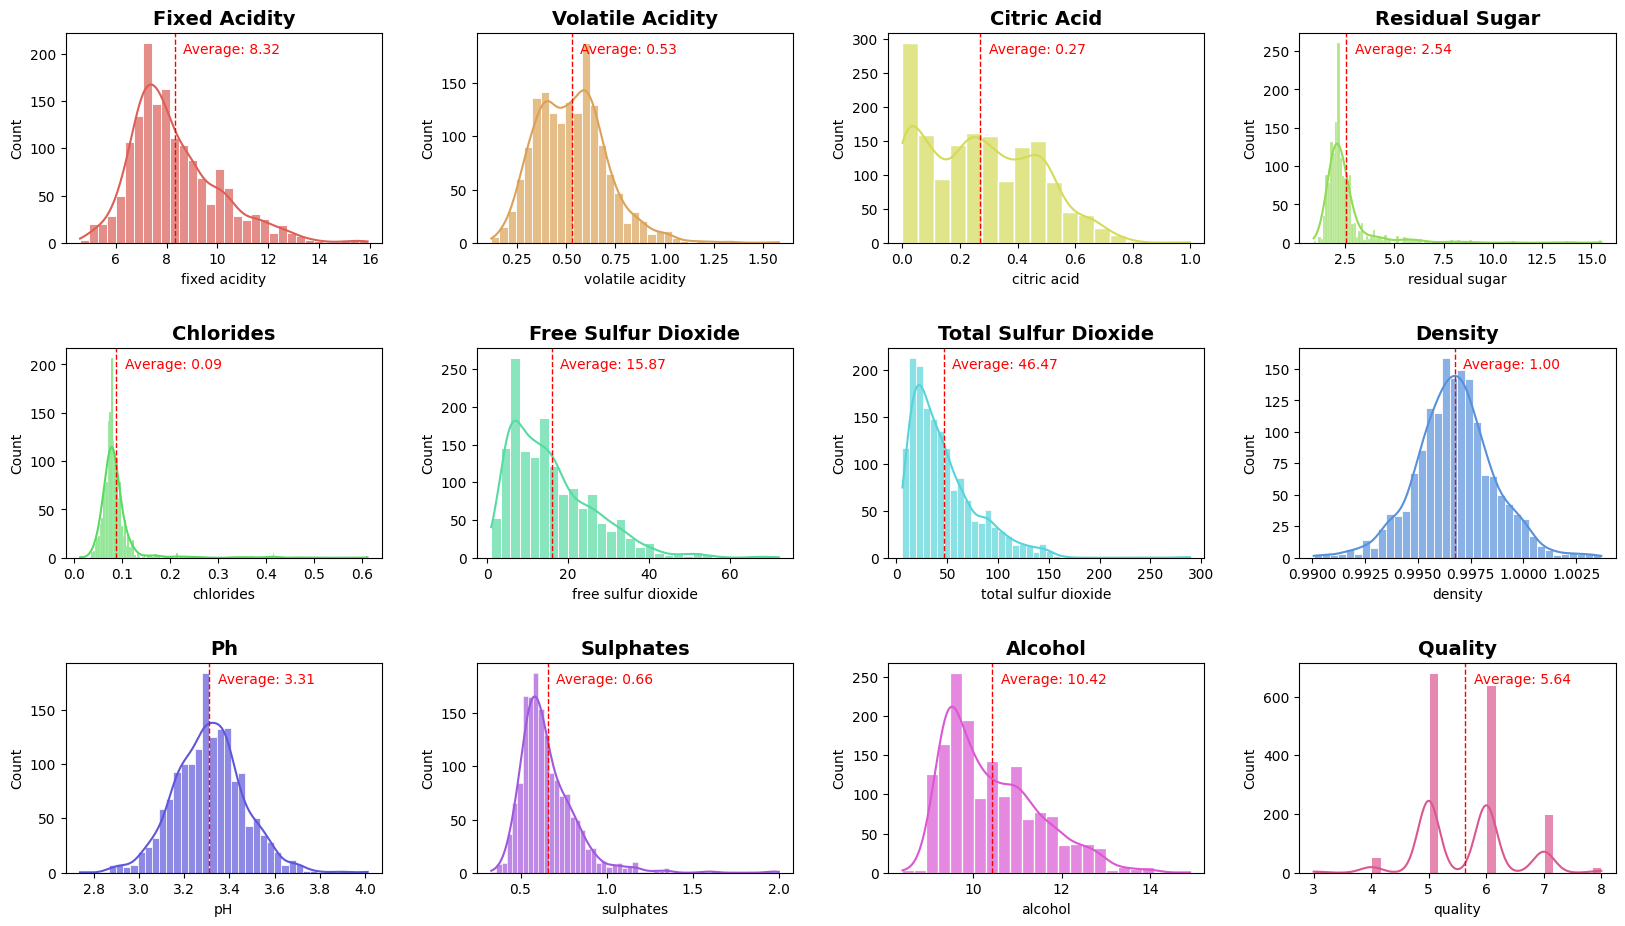

In [41]:
# Create subplots for the histograms
fig, axes = plt.subplots(len(df.columns)//4 + 1, 4, figsize=(20, 15),
                         gridspec_kw={'wspace': 0.3, 'hspace': 0.5})
axes = axes.flatten()

colors = sns.color_palette("hls", len(df.columns))

# Iterate through each feature to plot its histogram, add a mean line
for i, col in enumerate(df.columns):
    # Plot histogram
    sns.histplot(df[col], ax=axes[i], kde=True, color=colors[i], edgecolor='white', alpha=0.7)
    
    # Calculate mean
    mean_val = df[col].mean()
    axes[i].axvline(mean_val, color='r', linestyle='dashed', linewidth=1)
    
    # Annotate mean value on the plot
    min_ylim, max_ylim = axes[i].get_ylim()
    axes[i].text(mean_val + (df[col].max() - df[col].min()) * 0.03, max_ylim * 0.9, f'Average: {mean_val:.2f}', color='r')  

    # Added title to the plot
    axes[i].set_title(col.title(), fontsize=14, weight='bold')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Plot histogram for all columns with an average dotted line
plt.tight_layout()
plt.show()

Correlatio Analysis of Features (input) vs Label (output)

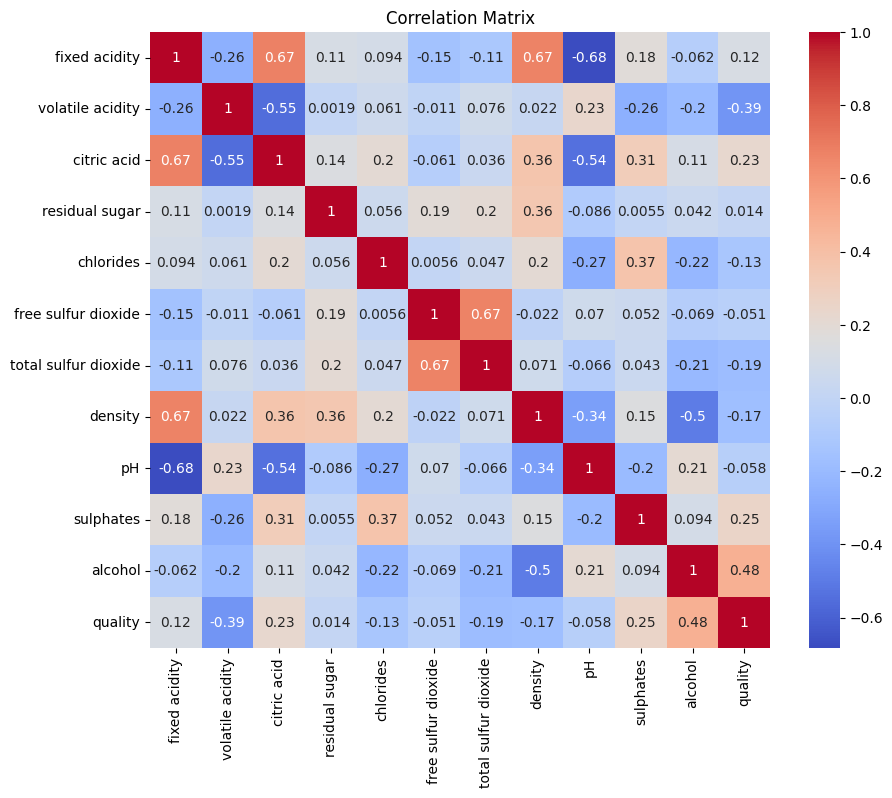

In [42]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Heatmap to show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

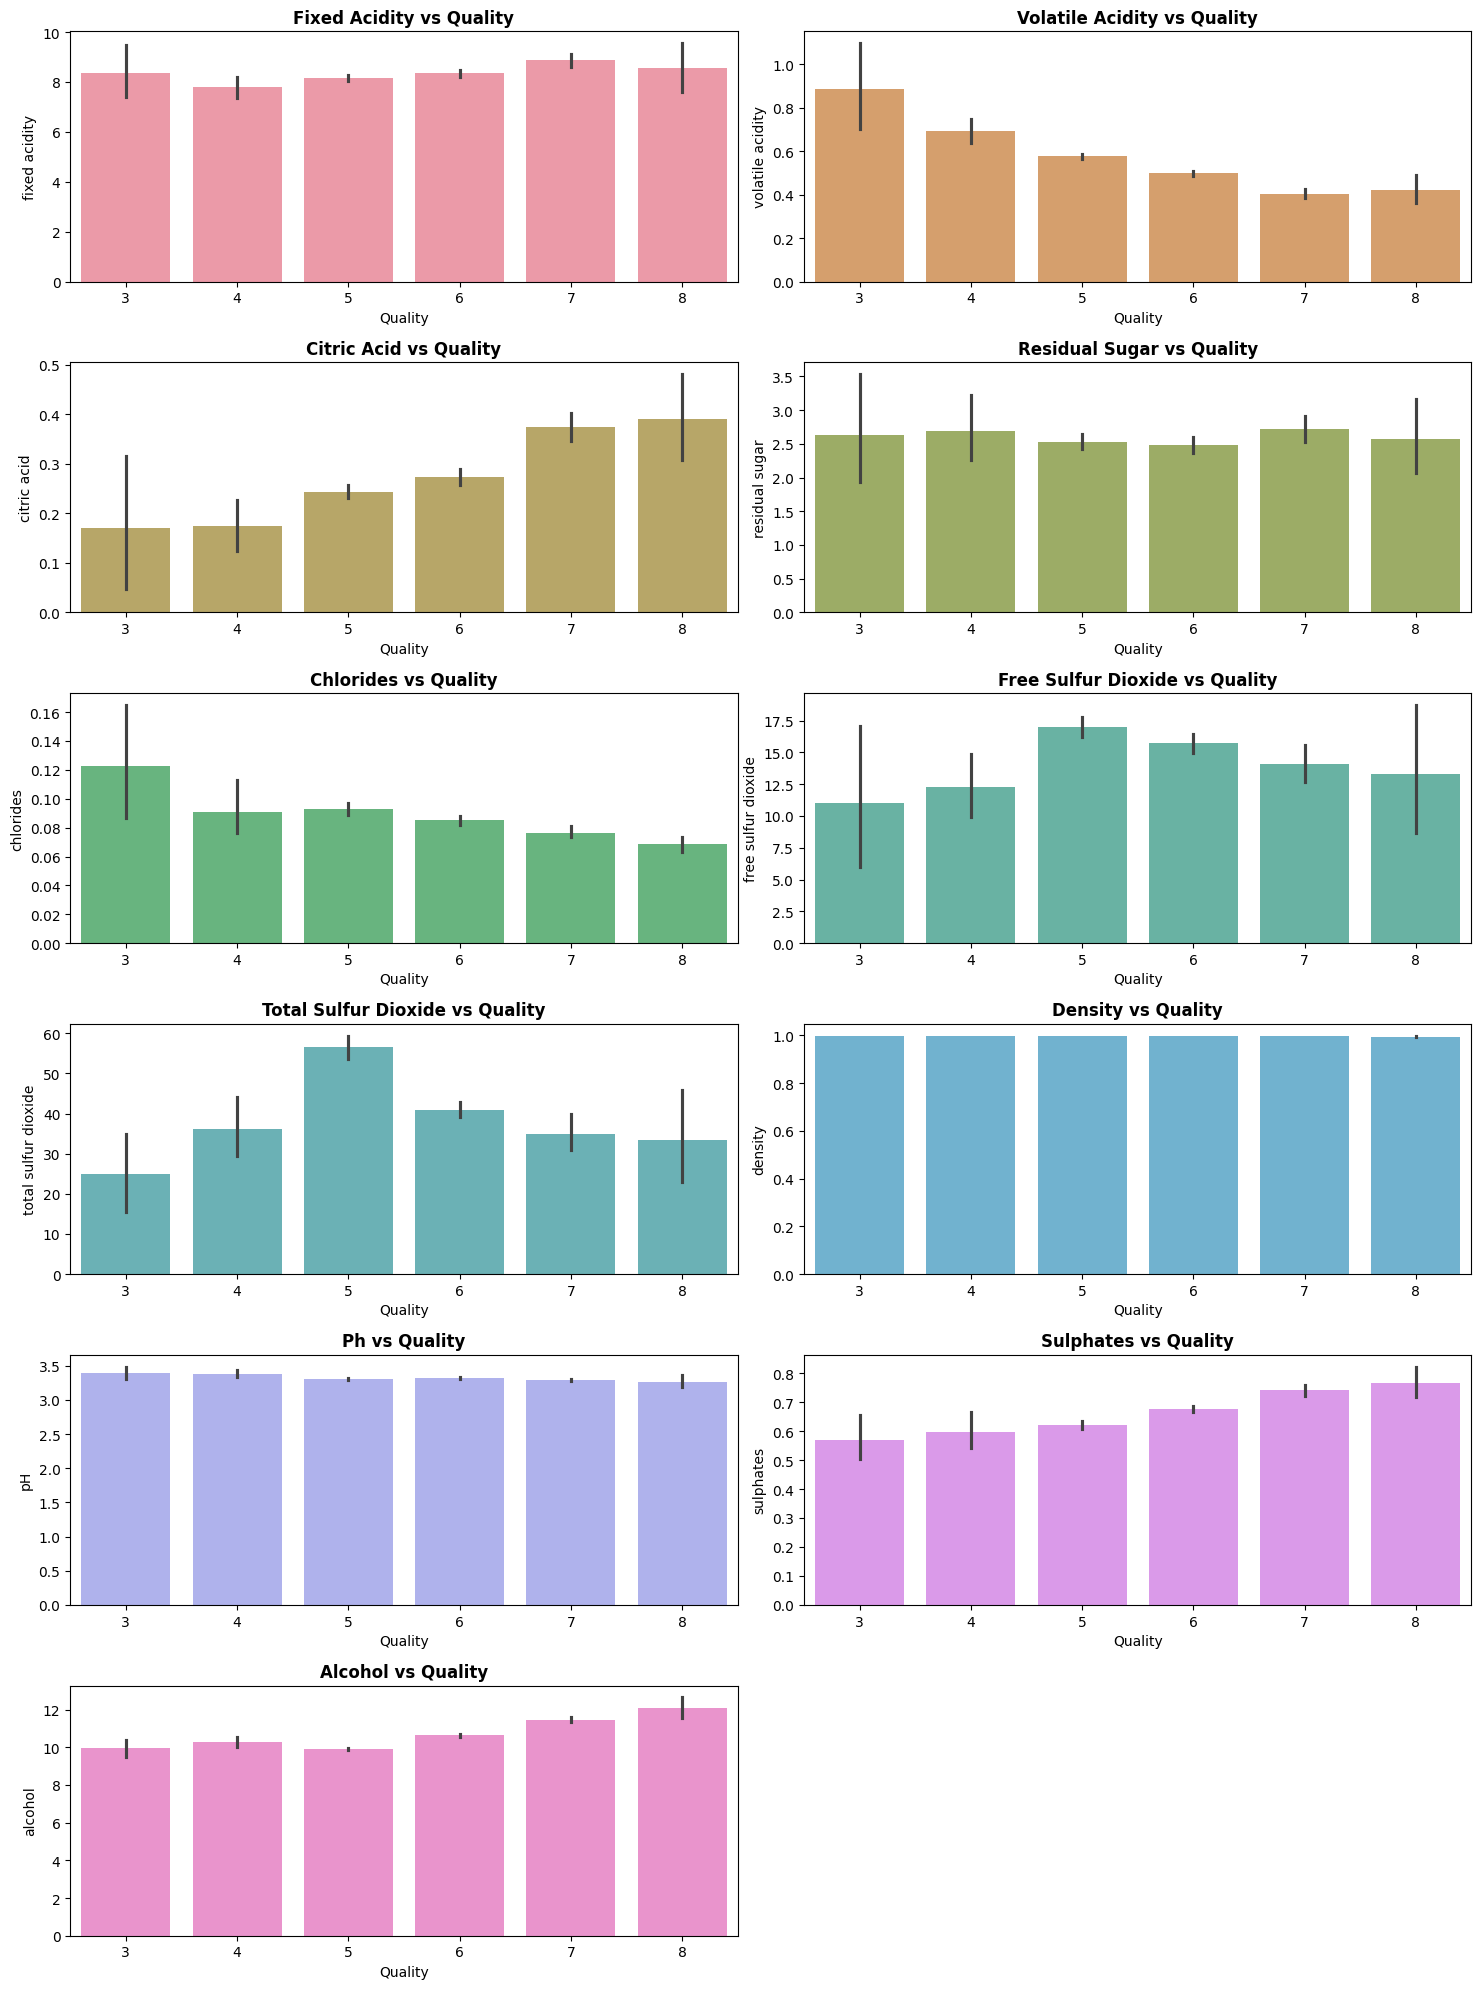

In [33]:
# Separate features and target variable
features = df.drop('quality', axis=1)
target = df['quality']

# Prepare plot parameters
num_cols = 2 
num_rows = (features.shape[1] + num_cols - 1) // num_cols 

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

# Define a color palette
colors = sns.color_palette("husl", len(features.columns))

# Loop over each feature and create bar plot with quality
for i, (feature_name, col) in enumerate(features.items()):
    sns.barplot(x=target, y=col, data=df, ax=axes[i], color=colors[i], alpha=0.8)
    axes[i].set_title(f'{feature_name.title()} vs Quality', weight='bold')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature_name)

# Remove any unused axes
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Plot barplot for all features vs quality
plt.tight_layout()
plt.show()


Decison Tree Model

In [45]:
# Preparing the data
from sklearn.model_selection import train_test_split

df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [46]:
# Buildind and training the model
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=3)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

         Bad       0.94      0.94      0.94       349
        Good       0.58      0.59      0.58        51

    accuracy                           0.89       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.89      0.89      0.89       400



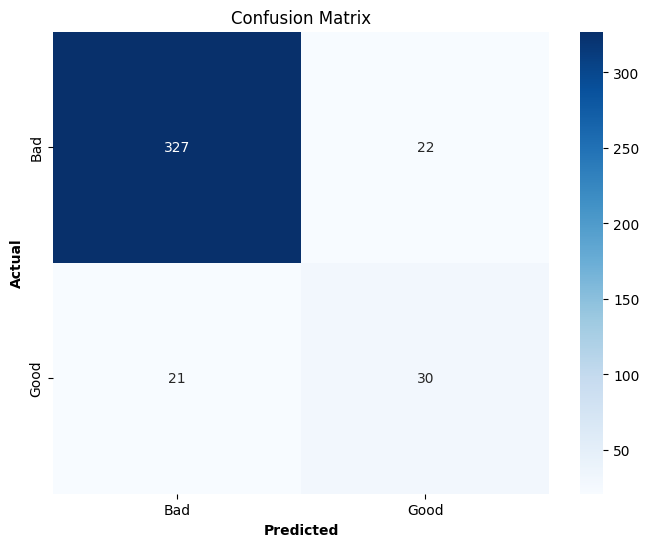

In [48]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the quality on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Bad', 'Good'])
print(f'Classification Report:\n{report}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted', weight='bold')
plt.ylabel('Actual', weight='bold')
plt.title('Confusion Matrix')
plt.show()
